# K-Means Clustering

In [1]:
## Author : Nikhil Tarte
## Contact: nikhilttarte@gmail.com

## Date: 08 March 2017

## Implementation of K-Means Algorithm over N Dimentions
#  Implement it on Digit Dataset
##

Imports

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import distance as d

Dataset Imports

In [3]:
from sklearn.datasets import load_digits

In [4]:
class KMeans:
    def __init__(self, dataset_X, k):
        #1. Initilize K for K Clusters Classification
        self.K = k
        self.Points = np.array(dataset_X)
        
        self.Clusters = [[] for i in range(k)]
        
        #2. Selecting Random K Samples as Cluster Centroids
        self.clusterCentroids = np.array(pd.DataFrame(dataset_X).sample(n = k))
        
    def performClustering(self):
        #3. Calcuation of Cluster
        while True:
            self.Clusters = [[] for i in range(self.K)]
            for indexPoint in range(len(self.Points)):
                distance = np.empty(self.K)
                for indexCentroid in range(self.K):
                    distance[indexCentroid] = d.euclidean(self.clusterCentroids[indexCentroid],self.Points[indexPoint])
                clusterIndex = np.argmin(distance)
                self.Clusters[clusterIndex].append(self.Points[indexPoint])

            #4. Mean Calcuation of Each Cluster and reSetting new Centroid 
            for indexCentroid in range(self.K):
                self.clusterCentroids[indexCentroid] = np.mean(self.Clusters[indexCentroid], axis=0)

            #5. Perform this Till No More Clustering can Be Done (Repeat 3 and 4)
            prevLenClusters = np.empty(self.K)
            currLenClusters = np.empty(self.K)
            prevLenClusters = np.repeat(0,self.K)
            
            for index in range(self.K):
                currLenClusters[index] = len(self.Clusters[index])
            
            if (np.array(prevLenClusters) == np.array(currLenClusters)).all:
                break
            else:
                prevLenClusters = currLenClusters
                for index in range(self.K):
                    currLenClusters[index] = len(self.Clusters[index])
            
        # 6. Return Ckusters
        return self.Clusters        

Implimentation on Digit Dataset

In [5]:
dataset = load_digits()
dataset.X = np.array(dataset.data)
dataset.y = np.array(dataset.target)

In [6]:
digitDS = KMeans(dataset.X,10)
Clusters = digitDS.performClustering()

In [7]:
import matplotlib.pyplot as plt

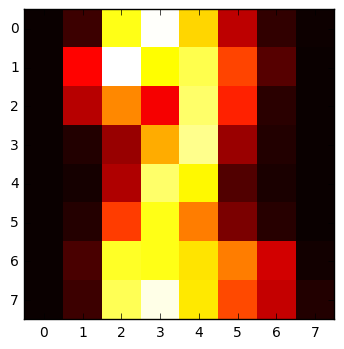

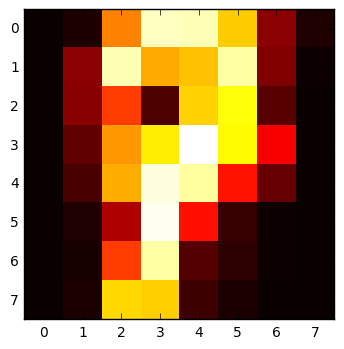

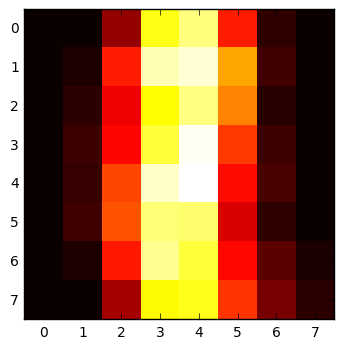

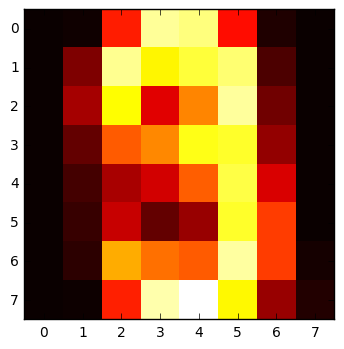

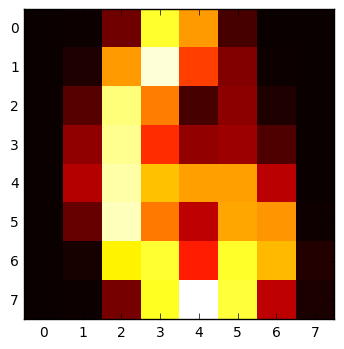

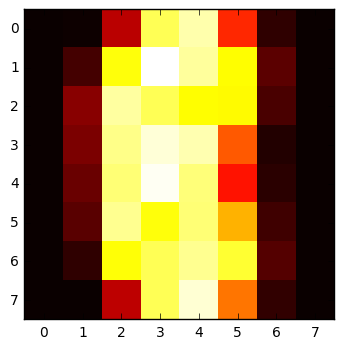

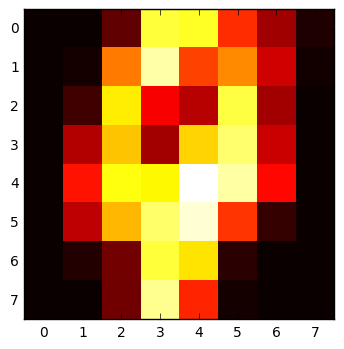

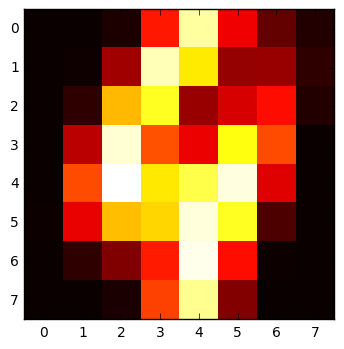

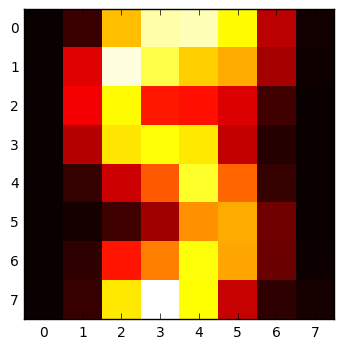

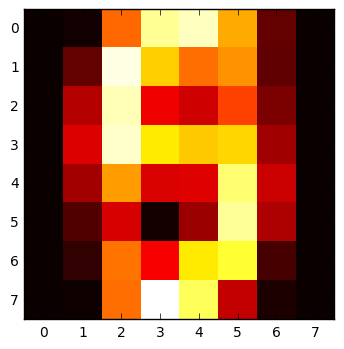

In [8]:
#such Clusters can be formed Mean Display as Accuracy and to Select Cluster 
for i in range(10):
    Cluster = np.array(digitDS.clusterCentroids[i])
    Cluster = Cluster.reshape(8,8)

    plt.imshow(Cluster, cmap='hot', interpolation='nearest')
    plt.show()


In [9]:
from sklearn.datasets import load_iris

In [10]:
dataset = load_iris()
dataset.X = np.array(dataset.data)
dataset.y = np.array(dataset.target)

In [11]:
irisDS = KMeans(dataset.X,3)
irisClusters = irisDS.performClustering()

In [12]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

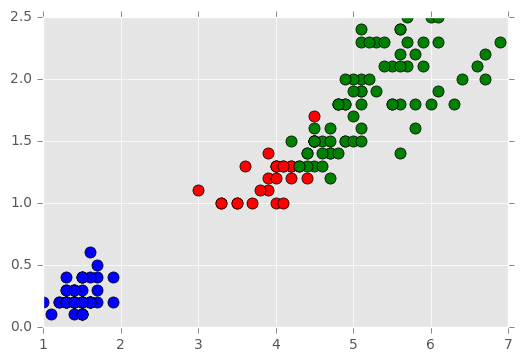

In [13]:
# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i in range(len(irisClusters)):
    for j in range(len(irisClusters[i])):
        if i == 0:
            ax.plot(irisClusters[i][j][2], irisClusters[i][j][3], marker='o', linestyle='',color = 'red', ms=8, label="Iris")
        if i == 1:
            ax.plot(irisClusters[i][j][2], irisClusters[i][j][3], marker='o', linestyle='',color = 'green', ms=8, label="Iris")
        if i == 2:
            ax.plot(irisClusters[i][j][2], irisClusters[i][j][3], marker='o', linestyle='', color = 'blue',ms=8, label="Iris")
plt.show()